In [1]:
!pip3 install -q torch torchvision

In [2]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

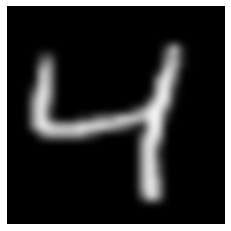

4
torch.Size([1, 28, 28])


In [3]:
mnist_dataset = datasets.MNIST(root='../data', train=True, transform = transforms.ToTensor(), download=True)

def show(img,renorm=False,nrow=8,interpolation='bicubic'):
  if renorm:
    img = img/2 + 0.5
  img_grid = torchvision.utils.make_grid(img,nrow=nrow).numpy()
  plt.figure()
  plt.imshow(np.transpose(img_grid, (1,2,0)), interpolation=interpolation)
  plt.axis('off')
  plt.show()

image, label =  mnist_dataset.__getitem__(2)
show(image)
print(label)
print(image.shape)

In [4]:
!mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
import zipfile
with zipfile.ZipFile('celeba.zip','r') as zip_ref:
    zip_ref.extractall('data_faces/')

FileNotFoundError: [Errno 2] No such file or directory: 'celeba.zip'

In [6]:
import os
root = 'data_faces/img_align_celeba'
img_list = os.listdir(root)
print(img_list)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'data_faces/img_align_celeba'

In [7]:
 def plot_image(align,nrow=2):   
    figsize = (20,10)
    ncol = 5
    fig = plt.figure(figsize=figsize)
    N = nrow*ncol
    for i, myid in enumerate(align["image_id"][:N]):
        image = load_img(dir_data + "/" + myid)
        image = img_to_array(image)/255.0

        (_, 
         lefteye_x,    lefteye_y,
         righteye_x,   righteye_y, 
         nose_x,       nose_y,
         leftmouth_x,  leftmouth_y, 
         rightmouth_x, rightmouth_y) = align.iloc[i]


        ax  = fig.add_subplot(nrow,ncol,i+1)
        ax.imshow(image)
        ax.set_title(image.shape)
        ax.scatter(lefteye_x,    lefteye_y)
        ax.scatter(righteye_x,   righteye_y)
        ax.scatter(nose_x,       nose_y)
        ax.scatter(leftmouth_x,  leftmouth_y)
        ax.scatter(rightmouth_x, rightmouth_y)
plot_image()

TypeError: plot_image() missing 1 required positional argument: 'align'

In [8]:
import pandas as pd
import plotly.offline as offline
import plotly.graph_objs as go

In [9]:
class Machine:
    def __init__(self):
        self.code_df = pd.DataFrame({'name' : [], 'code' : []})

    def krx_crawl(self):
        self.code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13',
                                    header=0)[0]
        self.code_df.종목코드 = self.code_df.종목코드.map('{:06d}'.format)
        self.code_df = self.code_df[['회사명','종목코드']]
        self.code_df = self.code_df.rename(columns={'회사명':'name','종목코드':'code'})

    def createDataframe(self, code):
        df = pd.DataFrame()
        for page in range(1, 21):
            pg_url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
            df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
            df.dropna(inplace=True)
        return df

    def rename_item_name(self, param):
        df = param.rename(columns = {'날짜':'date', '종가':'close','전일비':'diff',
                                           '시가':'open','고가':'high','저가':'low','거래량':'volumn'})
        df[['close', 'diff', 'open', 'high', 'low', 'volumn']] = \
            df[['close','diff','open','high','low','volumn']].astype(int)
        df['date'] = pd.to_datetime(df['date'])
        return df.sort_values(by=['date'], ascending=True)

In [10]:
m = Machine()
def print_menu():
    print('MENU \n 0. EXIT 1. 종목컬럼 2. 전처리결과')
    return input("메뉴 선택")


while 1:
    menu = print_menu()
    print('MENU %s \n' % menu)
    if menu == '0':
        break
    elif menu == '1':
        print(m.createDataframe('005930'))
    elif menu == '2':
        print(m.rename_item_name(m.createDataframe('005930')))

MENU 
 0. EXIT 1. 종목컬럼 2. 전처리결과


In [1]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
import pandas as pd
df = pd.read_csv(root_dir+'NSE-Tata-Global-Beverages-Limited.csv')

ModuleNotFoundError: No module named 'termios'